# Data Science
## Laboratorio 2 - Series de Tiempo

**Integrantes:**
- Diego Alberto Leiva 21750
- José Pablo Orellana 21970
- - -

### Librerias

In [1]:
# Manejo de archivos
import os 

# Manipulación de datos
import pandas as pd
import numpy as np
from datetime import datetime


# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import acf, pacf

# Estadística y series temporales
import statsmodels.tsa as tsa
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# advertencias
import warnings
warnings.filterwarnings('ignore')

## Analisis Exploratorio

### Comprensión Inicial

### Cargar el dataset

In [2]:
# Ruta de la carpeta
folder_path = 'data'

# Obtener los nombres de los archivos
file_names = [file for file in os.listdir(folder_path) if file.endswith('.csv') and not file.startswith('~')]

# Diccionario para almacenar los dataframes
data_frames = {}

# Iterar sobre los nombres de los archivos
for file in file_names:
    # Construir la ruta del archivo
    file_path = os.path.join(folder_path, file)
    file_name = file.split('.')[0]
    
    # Leer el archivo csv y almacenarlo en un dataframe
    df = pd.read_csv(file_path, sep=';', encoding='utf-8')
    
    # Guardar el dataframe en el diccionario con el nombre del archivo como clave
    data_frames[file_name] = df

# Mostrar los nombres de los archivos
print(f"Se cargaron un total de {len(data_frames)} archivos\n")
print('Archivos cargados:')
for key in data_frames.keys():
    print(f"\t- {key}")

Se cargaron un total de 3 archivos

Archivos cargados:
	- consumo_combustibles
	- importacion_combustibles
	- precios_combustible


### Visualizar informacion general del dataset

In [3]:
def get_info(df):
    info = pd.DataFrame({
        'Columnas': df.columns,
        'Tipos': df.dtypes,
        'Nulos': df.isnull().sum(),
        'Nulos (%)': (df.isnull().sum() * 100 / df.shape[0]).round(2),
        'Únicos': df.nunique(),
        'Duplicados': df.duplicated().sum()
    }).reset_index(drop=True)

    # Mostrar la informacion
    print(f"El dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas\n")
    display(info)

In [4]:
for dataset in data_frames.keys():
    print(f"Informacion del dataset: {dataset}")
    get_info(data_frames[dataset])
    print("\n",(100*'-'),"\n")

Informacion del dataset: consumo_combustibles
El dataframe tiene 293 filas y 23 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,Fecha,object,0,0.00,293,0
1,Aceites lubricantes,object,0,0.00,66,0
2,Asfalto,object,0,0.00,293,0
3,Bunker,object,0,0.00,293,0
4,Ceras,float64,1,0.34,31,0
5,Combustible turbo jet,object,0,0.00,234,0
6,Diesel bajo azufre,object,0,0.00,78,0
7,Diesel ultra bajo azufre,object,0,0.00,78,0
8,Gas licuado de petróleo,object,0,0.00,293,0
9,Gasolina de aviación,object,0,0.00,254,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: importacion_combustibles
El dataframe tiene 281 filas y 25 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,Fecha,object,0,0.00,281,0
1,Aceites lubricantes,object,0,0.00,66,0
2,Asfalto,object,0,0.00,270,0
3,Bunker,object,0,0.00,281,0
4,Ceras,float64,1,0.36,61,0
5,Combustible turbo jet,object,0,0.00,99,0
6,Diesel bajo azufre,object,0,0.00,78,0
7,Diesel ultra bajo azufre,object,0,0.00,47,0
8,Gas licuado de petróleo,object,0,0.00,281,0
9,Gasolina de aviación,object,0,0.00,165,0



 ---------------------------------------------------------------------------------------------------- 

Informacion del dataset: precios_combustible
El dataframe tiene 1312 filas y 9 columnas



,Columnas,Tipos,Nulos,Nulos (%),Únicos,Duplicados
0,FECHA,object,0,0.00,1312,0
1,Tipo de Cambio GTQ/USD,float64,5,0.38,861,0
2,Superior GTQ/GALON,float64,0,0.00,167,0
3,Regular GTQ/GALON,float64,0,0.00,168,0
4,Diesel GTQ/GALON,float64,0,0.00,174,0
5,Bunker GTQ/GALON,float64,0,0.00,130,0
6,Glp Cilindro 25LB,float64,0,0.00,16,0
7,Glp Cilindro 25LB por libra,float64,0,0.00,16,0
8,Unnamed: 8,float64,1312,100.00,0,0



 ---------------------------------------------------------------------------------------------------- 



#### Validar que tengan mismas columnas

In [5]:
flag = False

# Obtener la lista de columnas de un dataframe
first_df_columns = list(data_frames.values())[0].columns.tolist()

# Comprobar si todas las columnas de los dataframes son iguales
all_same_columns = all(df.columns.tolist() == first_df_columns for df in data_frames.values())

if all_same_columns:
    print("Todos los dataframes tienen las mismas columnas.")
    print("Se pueden concatenar en un solo dataframe.")
    flag = True
else:
    print("PROBLEMA: Los dataframes no tienen las mismas columnas.")
    print("No se pueden concatenar en un solo dataframe.")
    flag = False


PROBLEMA: Los dataframes no tienen las mismas columnas.
No se pueden concatenar en un solo dataframe.


Esto nos indica que los dataframes contien set de datos diferentes por lo tanto se deben de tratar de forma individual

----
### Preprocesamiento y Limpieza de datos

#### Verificación y manejo de valores Nulos o faltantes

##### Visualizar la data faltante

In [6]:
# Crear un mapa de calor para visualizar los datos faltante
def plot_missing_data_heatmap(df):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
    plt.show()

Dataset: consumo_combustibles


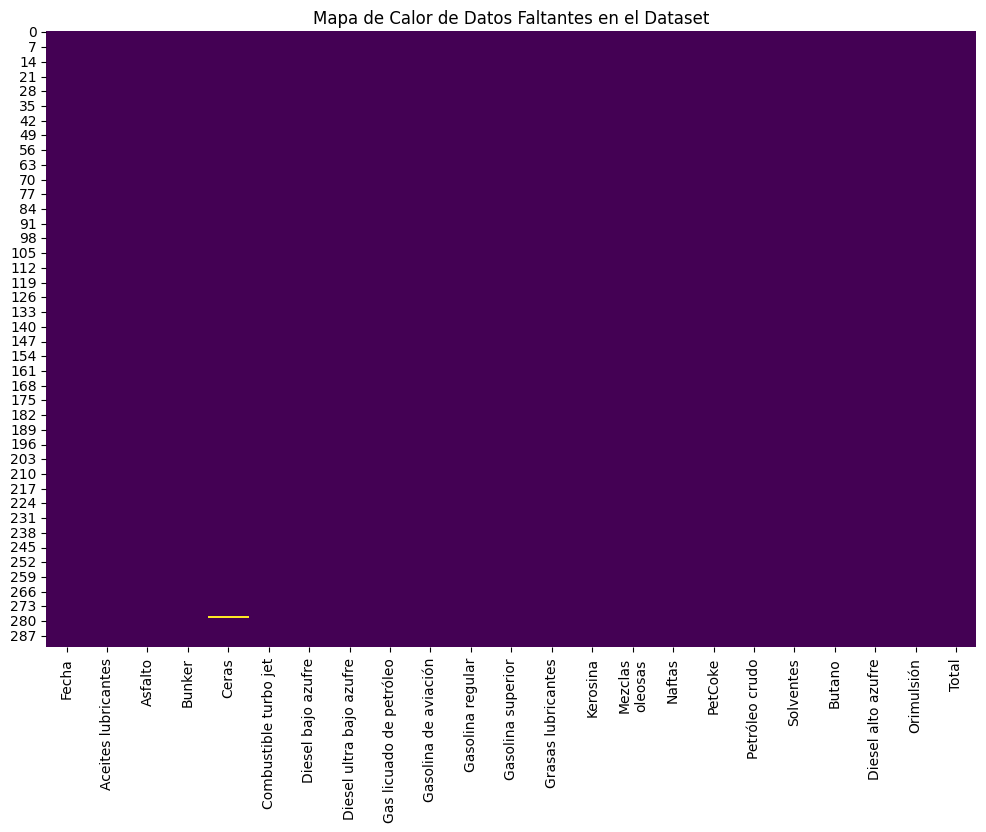


 ---------------------------------------------------------------------------------------------------- 

Dataset: importacion_combustibles


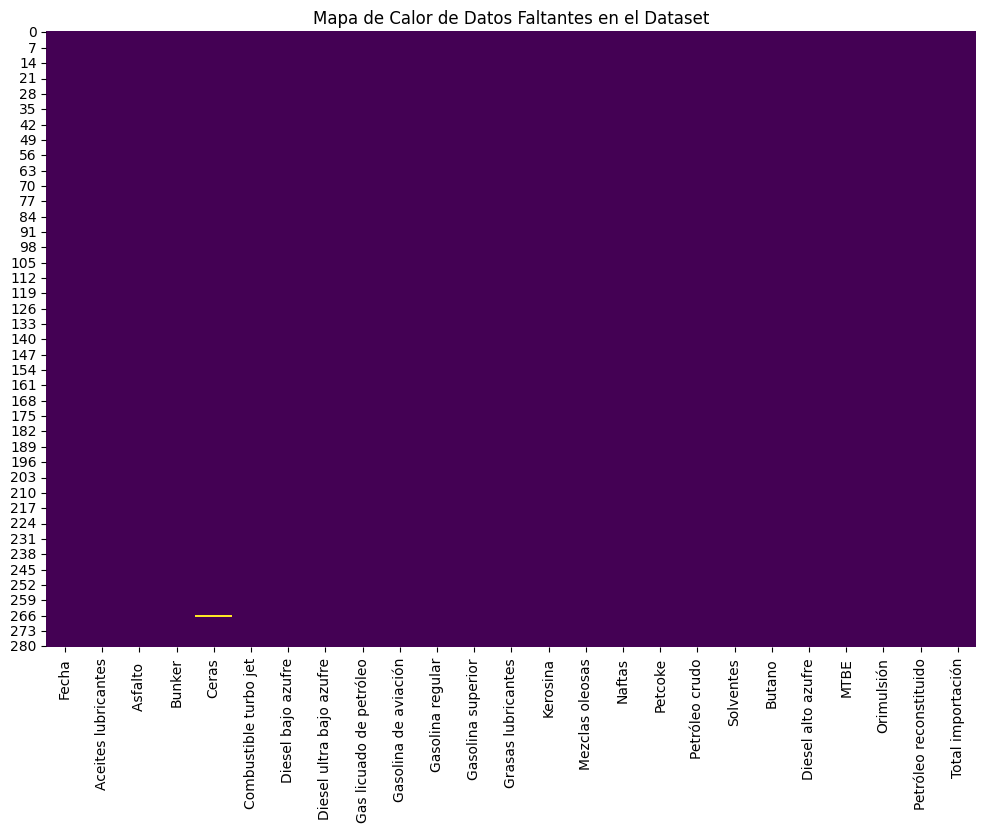


 ---------------------------------------------------------------------------------------------------- 

Dataset: precios_combustible


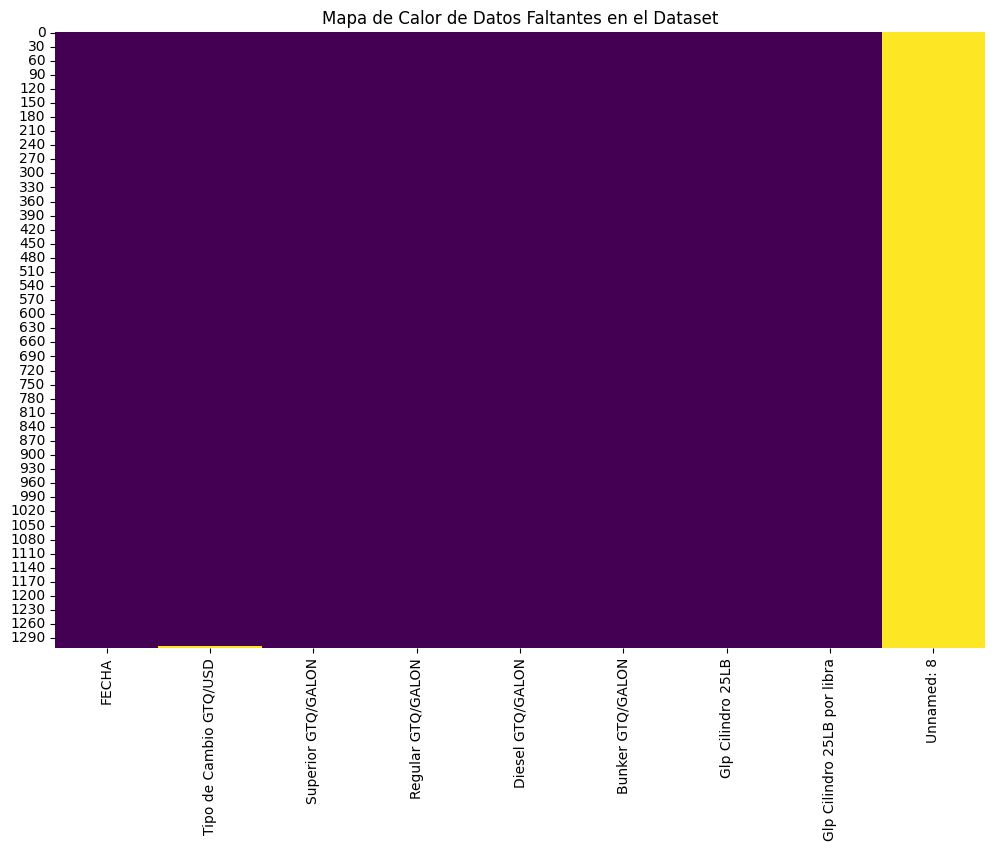


 ---------------------------------------------------------------------------------------------------- 



In [7]:
for dataset in data_frames.keys():
    print(f"Dataset: {dataset}")
    plot_missing_data_heatmap(data_frames[dataset])
    print("\n",(100*'-'),"\n")

Los graficos son muy claros y solo existe una columna completamente vacia para los precios probmedio, por lo tanto es factible eliminar unicamente sa columna y aparte eliminar los registros con datos faltantes.

In [8]:
# cargar cada dataset como su propio dataframe
consumos = data_frames['consumo_combustibles']
importaciones = data_frames['importacion_combustibles']
precios = data_frames['precios_combustible']

# Eliminar la columna 'Unnamed: 8' del dataframe de precios
precios.drop('Unnamed: 8', axis=1, inplace=True)

# Eliminar los registros con valores nulos
consumos.dropna(inplace=True)
importaciones.dropna(inplace=True)
precios.dropna(inplace=True)

In [9]:
consumos.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,ene/2000,0.00,"48,446.00","296,766.99",0.0,0.00,0.00,0.00,"194,410.48","1,426.00",...,"64,026.09",0.00,0.0,0.00,0.00,0.00,0.0,"634,667.06",0.00,"1,750,544.64"
1,feb/2000,0.00,"50,597.00","328,116.44",0.0,0.00,0.00,0.00,"174,710.55","1,458.00",...,"62,660.30",0.00,0.0,0.00,0.00,0.00,0.0,"642,380.66",0.00,"1,773,220.22"
2,mar/2000,0.00,"27,593.00","368,589.63",0.0,0.00,0.00,0.00,"189,234.07","1,503.00",...,"61,361.99",0.00,0.0,0.00,0.00,0.00,0.0,"699,807.25",0.00,"1,909,498.79"
3,abr/2000,0.00,"53,794.00","396,300.47",0.0,0.00,0.00,0.00,"174,330.61","1,561.00",...,"61,814.32",0.00,0.0,0.00,0.00,0.00,0.0,"586,803.98",0.00,"1,800,932.86"
4,may/2000,0.00,"60,137.00","449,368.92",0.0,0.00,0.00,0.00,"191,745.15","1,642.00",...,"54,098.32",0.00,0.0,0.00,0.00,0.00,0.0,"656,948.20",0.00,"1,941,771.90"


In [10]:
importaciones.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,ene/2001,0.00,"27,748.99","214,581.84",0.0,0.00,0.00,0.00,"194,065.74",820.00,...,0.0,0.00,0.00,0.00,0.0,"566,101.99","8,402.00",0.00,"715,344.00","2,312,639.05"
1,feb/2001,0.00,"7,503.57","294,609.00",0.0,0.00,0.00,0.00,"170,703.38","3,054.00",...,0.0,0.00,0.00,0.00,0.0,"489,525.80",0.00,0.00,"370,166.00","1,769,208.76"
2,mar/2001,0.00,"26,304.32","315,263.80",0.0,0.00,0.00,0.00,"161,837.37",677.00,...,0.0,0.00,0.00,0.00,0.0,"575,559.68",0.00,0.00,"360,530.00","1,945,770.26"
3,abr/2001,0.00,"7,885.89","205,653.00",0.0,0.00,0.00,0.00,"163,048.64","3,399.00",...,0.0,0.00,0.00,0.00,0.0,"437,745.42","8,184.00",0.00,"359,527.00","1,623,637.76"
4,may/2001,0.00,"8,443.16","278,371.30",0.0,0.00,0.00,0.00,"171,518.86",585.00,...,0.0,0.00,0.00,0.00,0.0,"552,609.13","12,680.00",0.00,"723,346.00","2,262,726.64"


In [11]:
precios.head()

,FECHA,Tipo de Cambio GTQ/USD,Superior GTQ/GALON,Regular GTQ/GALON,Diesel GTQ/GALON,Bunker GTQ/GALON,Glp Cilindro 25LB,Glp Cilindro 25LB por libra
0,01/ene/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
1,02/ene/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2,03/ene/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
3,04/ene/2021,7.79417,21.91,21.11,17.61,13.45,99.0,3.96
4,05/ene/2021,7.79369,21.91,21.11,17.61,13.45,99.0,3.96
